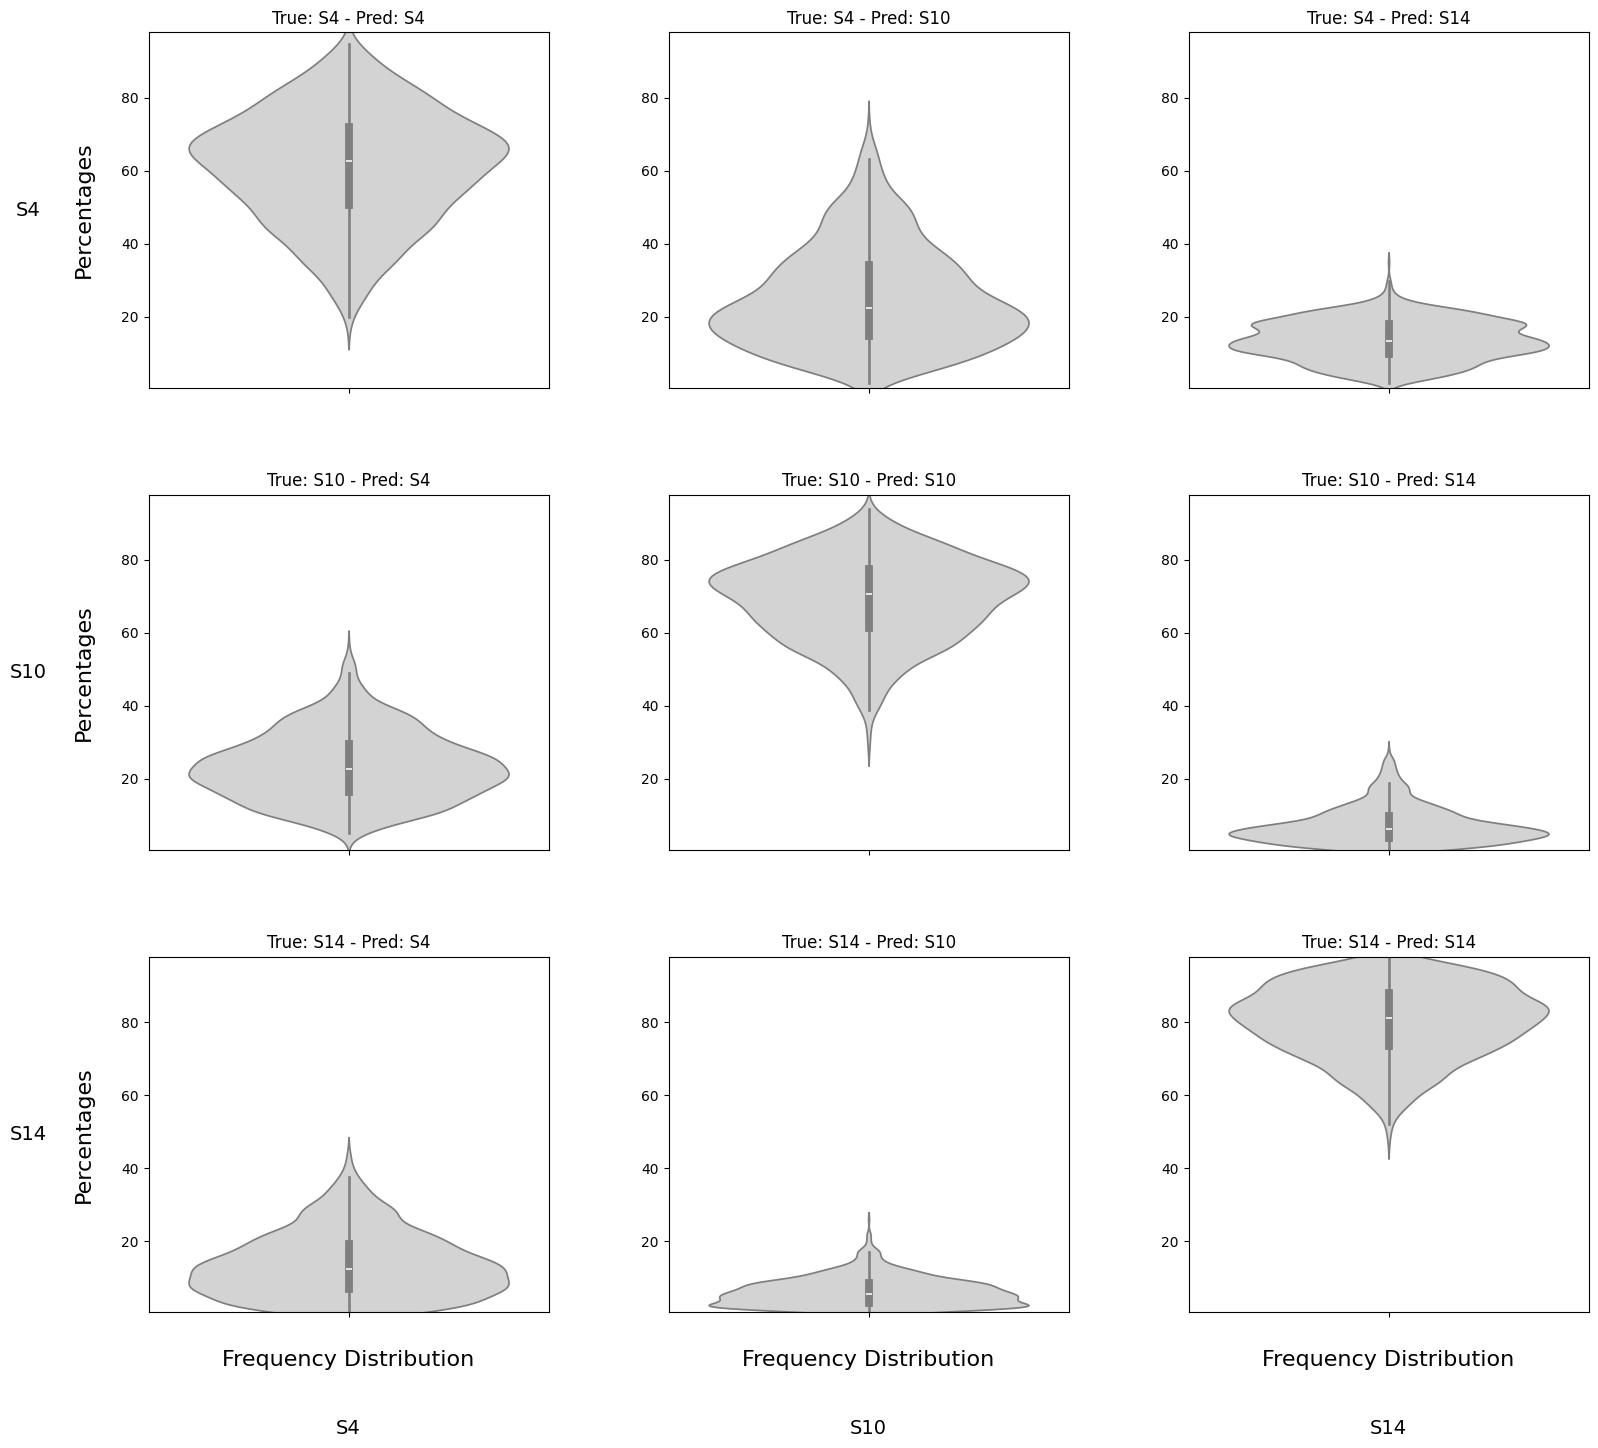

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

n = 1295  
confusion_values = {f'{i},{j}': [] for i in range(3) for j in range(3)} 

for i in range(n):
    try:
        data = np.load(f'/pscratch/sd/n/niranjan/output/prediction_{i}.npz')
        predictions = data['predictions']
        true_labels = data.get('true_labels', None)
        
        if true_labels is not None:
            pred_labels = np.argmax(predictions, axis=1)
            conf_matrix = confusion_matrix(true_labels, pred_labels)
            
            conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True) * 100
            
            for row in range(3):
                for col in range(3):
                    confusion_values[f'{row},{col}'].append(conf_matrix_normalized[row, col])

    except KeyError as e:
        print(f"File prediction_{i}.npz is missing the key: {e}")
    except Exception as e:
        print(f"An error occurred with file prediction_{i}.npz: {e}")

# Calculate global min and max for y-axis limits
all_values = [value for values in confusion_values.values() for value in values]
y_min = min(all_values)
y_max = max(all_values)

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 16))  # Increased size for clarity
labels = ['S4', 'S10', 'S14']
pred_labels = ['S4', 'S10', 'S14']

for row in range(3):
    for col in range(3):
        ax = axes[row, col]
        values = confusion_values[f'{row},{col}']
        sns.violinplot(data=values, ax=ax, color='lightgray')
        ax.set_title(f'True: {labels[row]} - Pred: {pred_labels[col]}', fontsize=12)
        
        ax.set_ylim(y_min, y_max)  # Set the same y-axis limits

# Set row labels (Percentages) only for the first column with increased font size
for ax, row_label in zip(axes[:, 0], labels):
    ax.yaxis.set_label_position('left')
    ax.set_ylabel('Percentages', fontsize=16, labelpad=20)  # Increase font size and add padding
    # Add the S4, S10, S14 labels to the left of the Percentages label
    ax.text(-0.3, 0.5, row_label, ha='center', va='center', fontsize=14, transform=ax.transAxes)  # New label position

# Set column labels (Frequency Distribution) only for the last row with increased font size
for ax, col_label in zip(axes[2], pred_labels):
    ax.set_xlabel('Frequency Distribution', fontsize=16, labelpad=20)  # Increase font size and add padding

# Add S4, S10, S14 labels below each frequency distribution (X-axis label)
for i, label in enumerate(pred_labels):
    axes[2, i].text(0.5, -0.3, label, ha='center', va='top', fontsize=14, transform=axes[2, i].transAxes)  # Adjusted position

# Adjust layout to prevent label cutoff
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])  # Leave space for the overall labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3, wspace=0.3)  # Reduced bottom spacing

# Save the plot as a high-resolution PNG
#plt.savefig('confusion_violin_plot.png', dpi=300, bbox_inches='tight')  # You can also save as PDF or SVG

plt.show()


In [ ]:
# Visualising stuff

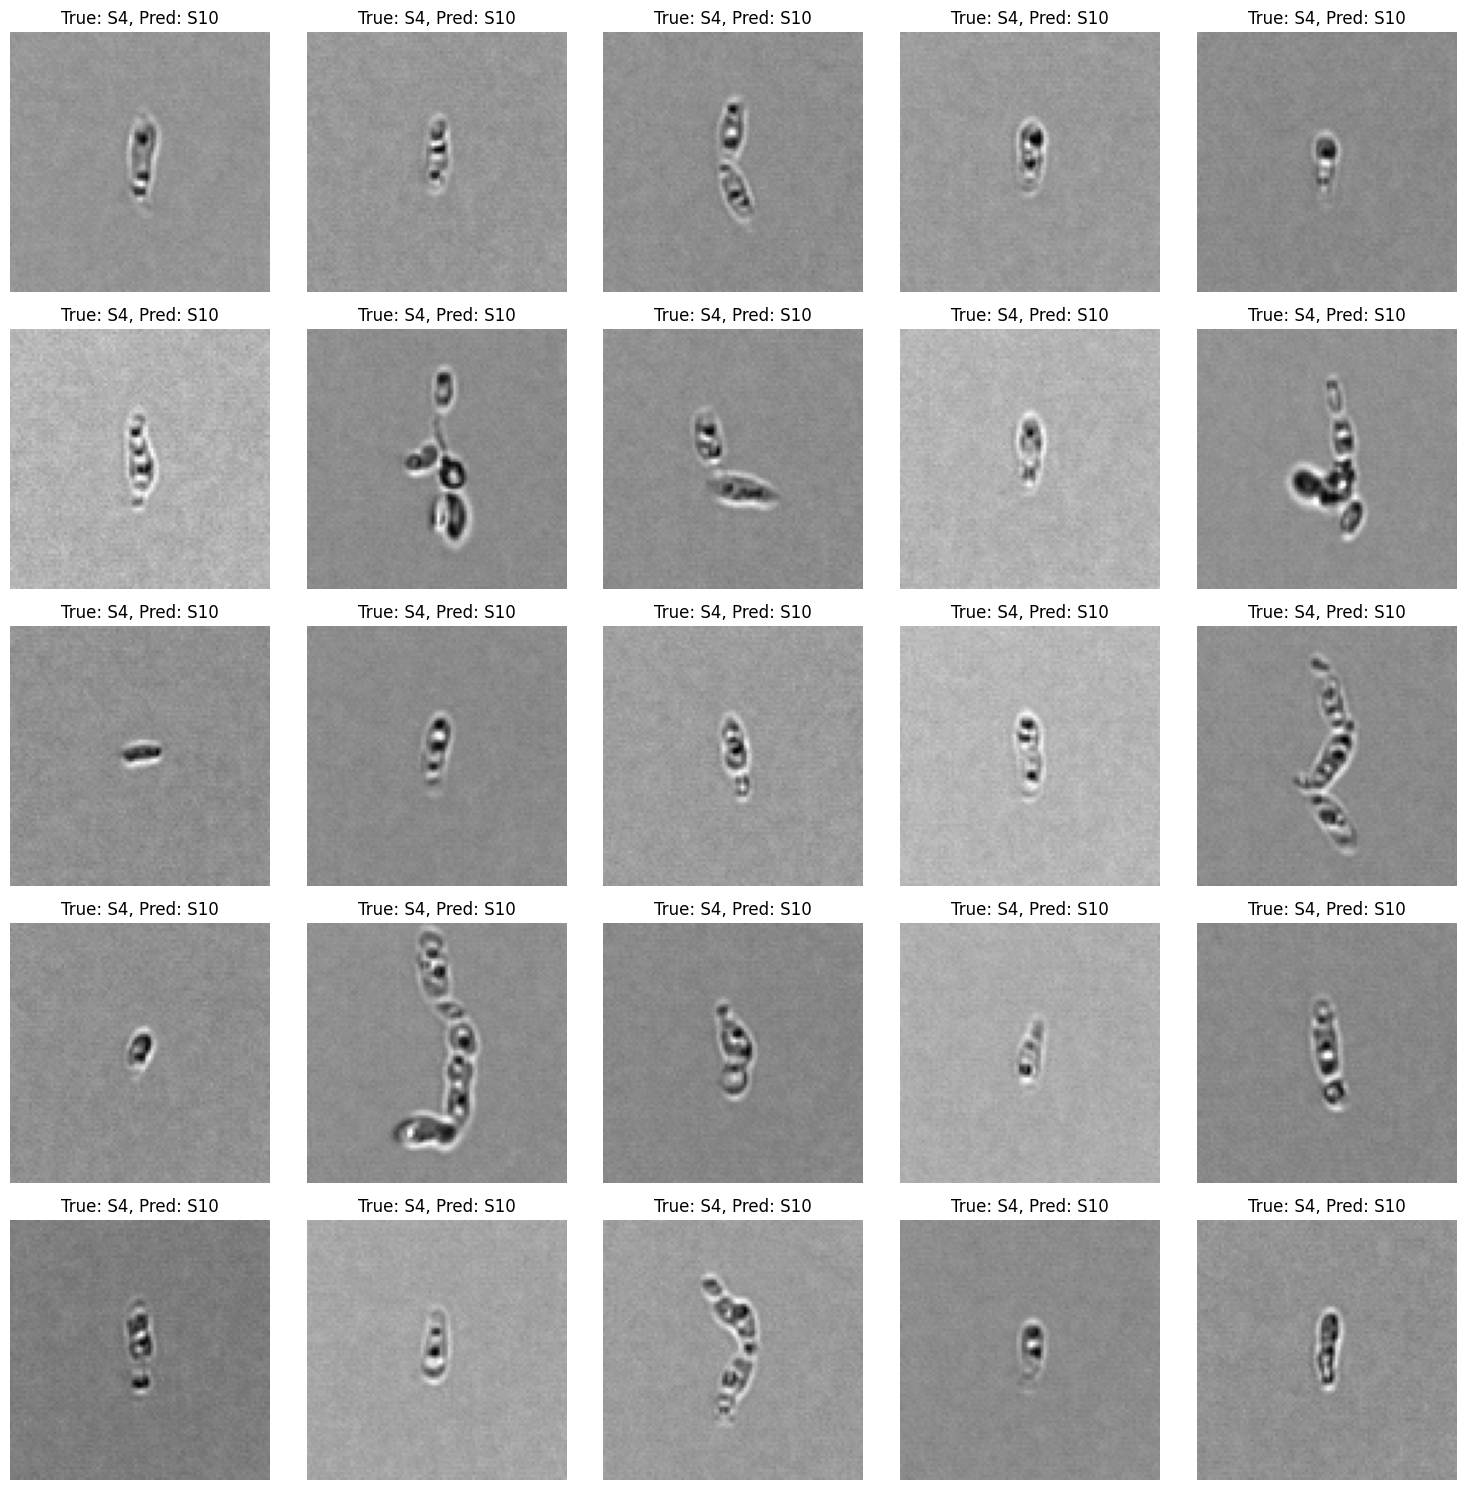

In [26]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '/pscratch/sd/n/niranjan/output/optatune/ambr01_misclassify/misclassified_10_04_01_05/misclassified_S4_as_S10.npz'
data = np.load(file_path)

images = data['images']
true_labels = data['true_labels']
pred_labels = data['pred_labels']

class_names = ['S10', 'S14', 'S4']  # Modify according to your classes

true_labels_str = [class_names[int(label)] for label in true_labels]
pred_labels_str = [class_names[int(label)] for label in pred_labels]

num_images_to_display = 25   ######### Change ###########

plt.figure(figsize=(15, 15))

rows = 5
cols = 5

for i in range(num_images_to_display):
    plt.subplot(rows, cols, i + 1)  
    plt.imshow(images[i], cmap='gray') 
    plt.title(f'True: {true_labels_str[i]}, Pred: {pred_labels_str[i]}')  
    plt.axis('off')  

plt.tight_layout()
plt.show()


In [ ]:
# Plotting the UMap for Ambr01

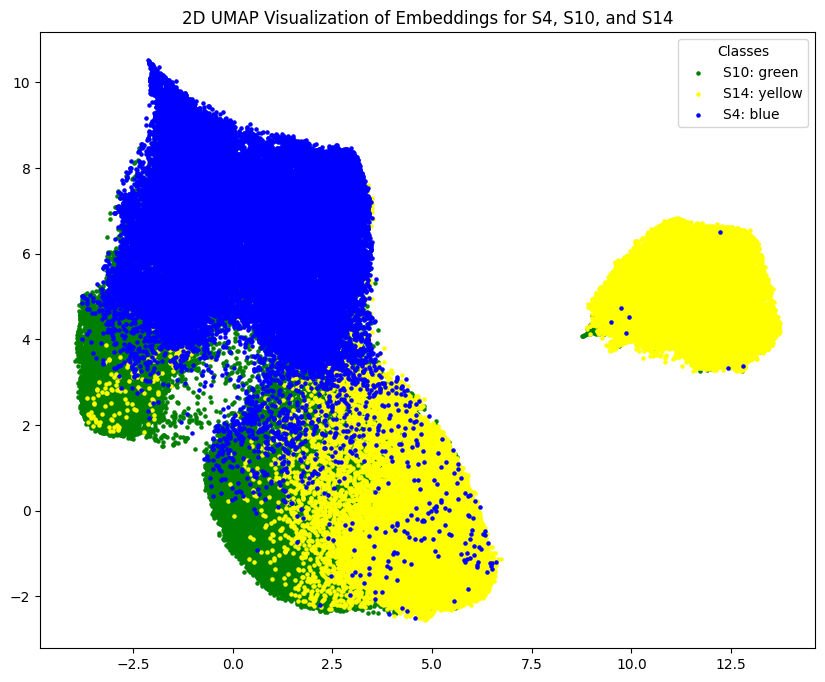

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import umap

# Load the embeddings and labels from the NPZ file
# embeddings_path = '/pscratch/sd/n/niranjan/output/optatune/visualizer/ambr01_2D_visualizer.npz'
embeddings_path = '/pscratch/sd/n/niranjan/output/prediction_save_emb_10_03_01.npz'

data = np.load(embeddings_path)

# Access the embeddings and labels
embeddings = data['predictions']  # Adjust if the key is different
labels = data['time_labels']    # Assuming there are labels stored in a key 'time_labels'

# Initialize UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')

# Fit and transform the embeddings
umap_embeddings = umap_model.fit_transform(embeddings)

# Create a color mapping for the classes (S4, S10, S14)
color_mapping = {
    2: 'blue',   # S4
    0: 'green',  # S10
    1: 'yellow'  # S14
}

# Create a list of unique class labels (S4, S10, S14)
unique_classes = np.unique(labels)

# Create a scatter plot without gridlines and with smaller points
plt.figure(figsize=(10, 8))

for class_label in unique_classes:
    mask = labels == class_label
    plt.scatter(umap_embeddings[mask, 0], umap_embeddings[mask, 1], 
                s=5, color=color_mapping[class_label], label=f'{class_label}')  # Smaller points

# Add a legend with correct labels for S4, S10, and S14
legend_mapping = {2: 'S4: blue', 0: 'S10: green', 1: 'S14: yellow'}
plt.legend([legend_mapping[cl] for cl in unique_classes], title='Classes')

# Add a title and axis labels
plt.title('2D UMAP Visualization of Embeddings for S4, S10, and S14')
plt.grid(False)  # Remove gridlines

# Show the plot
plt.show()


In [ ]:
# Plotting the UMap for Ambr03

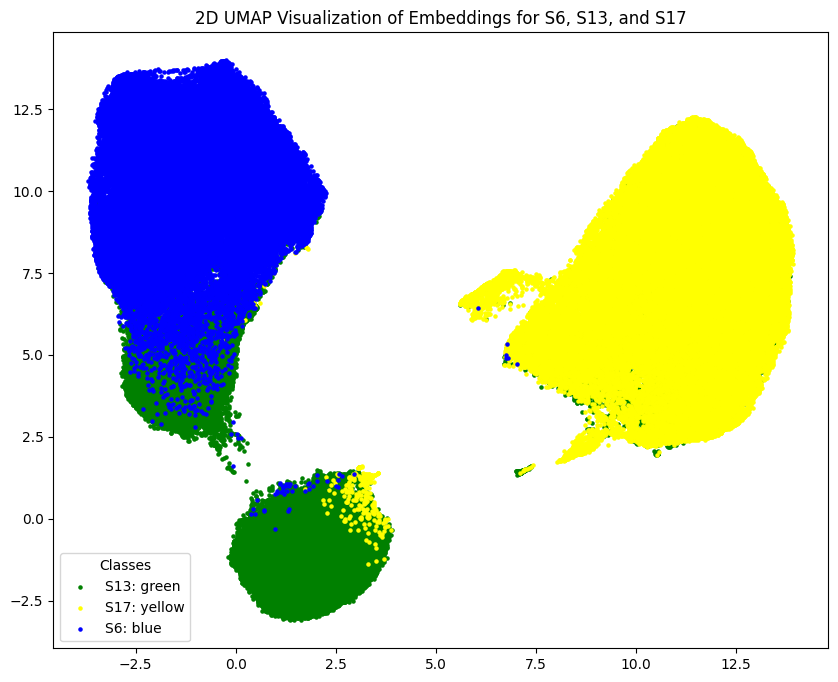

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import umap

# Load the embeddings and labels from the NPZ file
# embeddings_path = '/pscratch/sd/n/niranjan/output/optatune/visualizer/ambr01_2D_visualizer.npz'
embeddings_path = '/pscratch/sd/n/niranjan/output/ambr03/prediction_save_emb_10_03_03.npz'
data = np.load(embeddings_path)

# Access the embeddings and labels
embeddings = data['predictions']  # Adjust if the key is different
labels = data['time_labels']    # Assuming there are labels stored in a key 'time_labels'

# Initialize UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')

# Fit and transform the embeddings
umap_embeddings = umap_model.fit_transform(embeddings)

# Create a color mapping for the classes (S6, S13, S17)
color_mapping = {
    2: 'blue',   # S6
    0: 'green',  # S13
    1: 'yellow'  # S17
}

# Create a list of unique class labels (S6, S13, S17)
unique_classes = np.unique(labels)

# Create a scatter plot without gridlines and with smaller points
plt.figure(figsize=(10, 8))

for class_label in unique_classes:
    mask = labels == class_label
    plt.scatter(umap_embeddings[mask, 0], umap_embeddings[mask, 1],
                s=5, color=color_mapping[class_label], label=f'{class_label}')  # Smaller points

# Add a legend with correct labels for S6, S13, and S17
legend_mapping = {2: 'S6: blue', 0: 'S13: green', 1: 'S17: yellow'}
plt.legend([legend_mapping[cl] for cl in unique_classes], title='Classes')

# Add a title and axis labels
plt.title('2D UMAP Visualization of Embeddings for S6, S13, and S17')
plt.grid(False)  # Remove gridlines

# Show the plot
plt.show()


In [ ]:
# Plotting grid of ambr01 by jormalising then averaging out

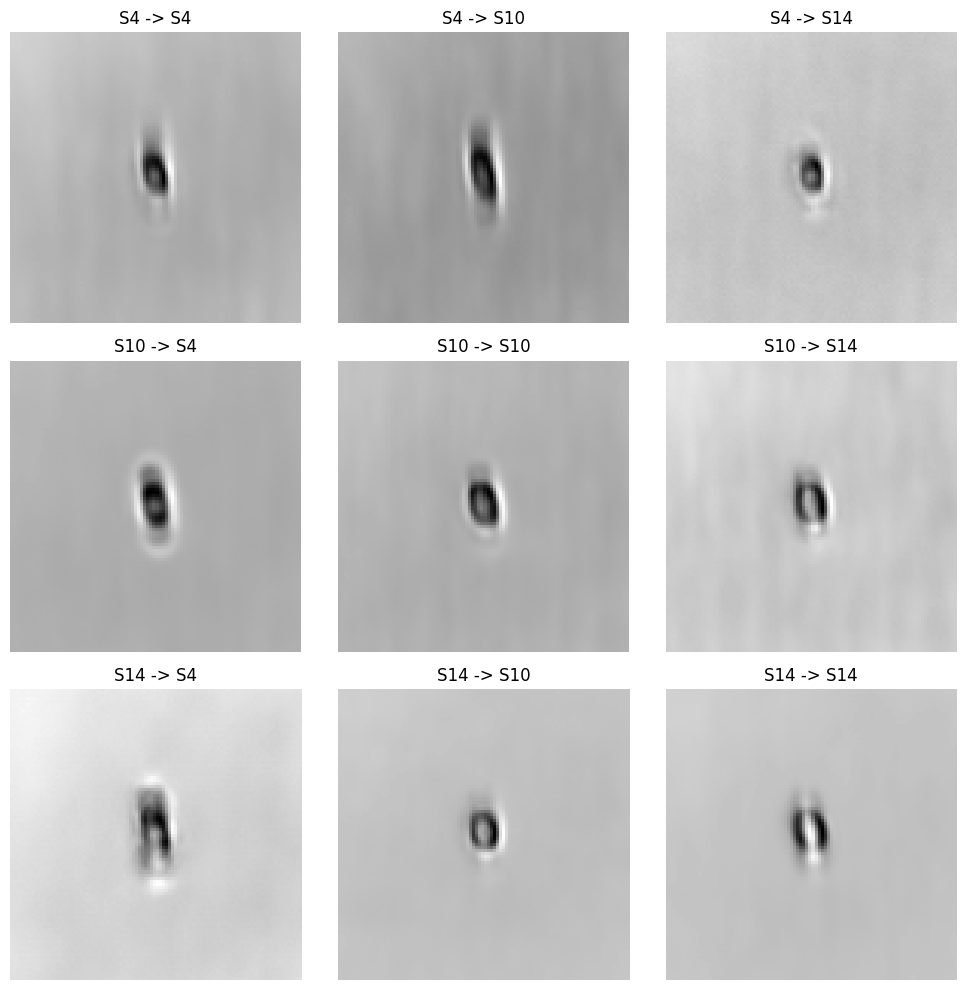

In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from lmcontrol.nn.dataset import get_transforms

# Load the .npz file
file_path = '/pscratch/sd/n/niranjan/output/prediction_10_04_01_05.npz'
data = np.load(file_path)

true_labels = data['true_labels']
pred_labels = data['pred_labels']
images = data['images']

# Define label mapping and categories
label_mapping = {0: 'S10', 1: 'S14', 2: 'S4'}  # Change if needed

categories = {
    'S4->S10': [], 'S4->S14': [], 'S4->S4': [],
    'S10->S10': [], 'S10->S14': [], 'S10->S4': [],
    'S14->S10': [], 'S14->S14': [], 'S14->S4': []
}

# Get the transformation function
tfm = get_transforms('float', 'norm')  # Apply transformations

def apply_transform(image, tfm):
    """Converts the image to a tensor and applies the transformation pipeline."""
    image_tensor = torch.from_numpy(image)
    if image_tensor.ndim == 2:  # Add channel dimension for grayscale images
        image_tensor = image_tensor.unsqueeze(0)
    return tfm(image_tensor)

# Populate the categories with transformed images
for i, (true_label, pred_label) in enumerate(zip(true_labels, pred_labels)):
    true_label_str = label_mapping[true_label]
    pred_label_str = label_mapping[pred_label]
    category = f"{true_label_str}->{pred_label_str}"
    image = images[i]
    transformed_image = apply_transform(image, tfm)
    categories[category].append(transformed_image)

# Compute averaged images for each category
averaged_images = {}
for category, image_list in categories.items():
    if len(image_list) > 0:
        avg_image = torch.stack(image_list).mean(dim=0).numpy()  # Average images
        averaged_images[category] = avg_image

# Define label order for plotting
label_order = ['S4', 'S10', 'S14']

# Create a 3x3 plot of averaged images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, true_label in enumerate(label_order):
    for j, pred_label in enumerate(label_order):
        category = f"{true_label}->{pred_label}"
        if category in averaged_images:
            avg_image = averaged_images[category]
            if avg_image.ndim == 3:
                avg_image = avg_image.transpose(1, 2, 0)  # Convert channels to last dimension
            axes[i, j].imshow(avg_image, cmap='gray')  # Plot averaged image
        axes[i, j].set_title(f"{true_label} -> {pred_label}")
        axes[i, j].axis('off')

plt.tight_layout()

# Save the plot to the desired directory
output_plot_path = '/pscratch/sd/n/niranjan/visualisation/Plot_no_delete.png'
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')

plt.show()


In [29]:
# Plotting the medians out (instead of averages that we observed in above)

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from lmcontrol.nn.dataset import get_transforms

file_path = '/pscratch/sd/n/niranjan/output/prediction_10_04_01_05.npz'
data = np.load(file_path)

true_labels = data['true_labels']
pred_labels = data['pred_labels']
images = data['images']

label_mapping = {0: 'S10', 1: 'S14', 2: 'S4'}  # Change if needed

categories = {
    'S4->S10': [], 'S4->S14': [], 'S4->S4': [],
    'S10->S10': [], 'S10->S14': [], 'S10->S4': [],
    'S14->S10': [], 'S14->S14': [], 'S14->S4': []
}

tfm = get_transforms('float', 'norm')  # Apply transformations

def apply_transform(image, tfm):
    """Converts the image to a tensor and applies the transformation pipeline."""
    image_tensor = torch.from_numpy(image)
    if image_tensor.ndim == 2:  # Add channel dimension for grayscale images
        image_tensor = image_tensor.unsqueeze(0)
    return tfm(image_tensor)

for i, (true_label, pred_label) in enumerate(zip(true_labels, pred_labels)):
    true_label_str = label_mapping[true_label]
    pred_label_str = label_mapping[pred_label]
    category = f"{true_label_str}->{pred_label_str}"
    image = images[i]
    transformed_image = apply_transform(image, tfm)
    categories[category].append(transformed_image)

median_images = {}
for category, image_list in categories.items():
    if len(image_list) > 0:
        stacked_images = torch.stack(image_list)
        median_image = torch.median(stacked_images, dim=0)[0].numpy()  
        median_images[category] = median_image

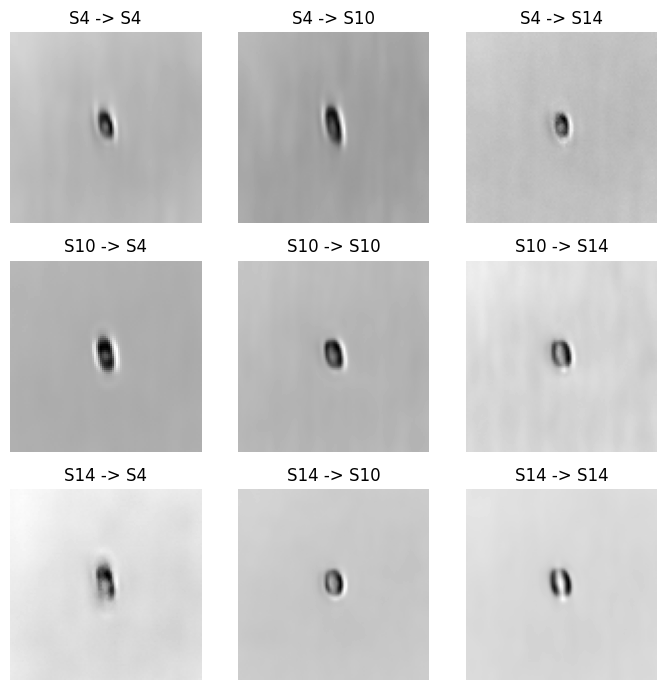

In [2]:
label_order = ['S4', 'S10', 'S14']


fig, axes = plt.subplots(3, 3, figsize=(7, 7))

for i, true_label in enumerate(label_order):
    for j, pred_label in enumerate(label_order):
        category = f"{true_label}->{pred_label}"
        if category in median_images:
            median_image = median_images[category]
            if median_image.ndim == 3:
                median_image = median_image.transpose(1, 2, 0)  
            axes[i, j].imshow(median_image, cmap='gray')  
        axes[i, j].set_title(f"{true_label} -> {pred_label}")
        axes[i, j].axis('off')

plt.tight_layout()

output_plot_path = '/pscratch/sd/n/niranjan/visualisation/Plot_no_delete_median.png'
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')

plt.show()

In [3]:
import numpy as np

def print_npz_keys(file_path):
    # Load the NPZ file
    npz_file = np.load(file_path)

    # Print all keys in the NPZ file
    print("Keys in the NPZ file:")
    for key in npz_file.keys():
        print(key)

# Example usage:
file_path = "/pscratch/sd/n/niranjan/output/prediction_10_09_01_00.npz"  # Replace with the actual file path
print_npz_keys(file_path)


Keys in the NPZ file:
predictions
true_labels
pred_values
images
time_classes
time_labels


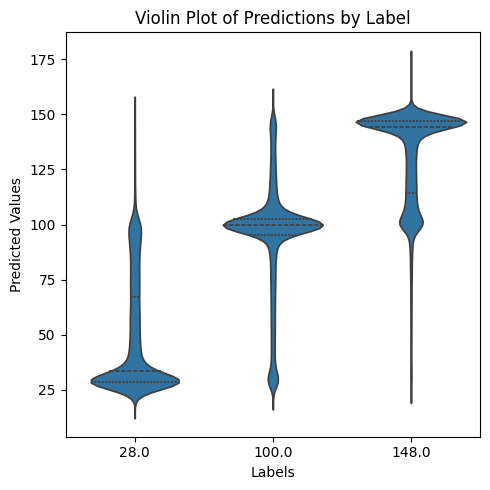

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_true_vs_pred_and_violin(file_path):
    npz_file = np.load(file_path)
    
    true_labels = npz_file['true_labels']
    pred_values = npz_file['pred_values']
    time_labels = npz_file['time_labels'] 
    
    plt.figure(figsize=(5, 5))

    sns.violinplot(x=true_labels, y=pred_values, inner="quartile")
    plt.title('Violin Plot of Predictions by Label')
    plt.xlabel('Labels')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

file_path = "/pscratch/sd/n/niranjan/output/prediction_10_14_01_00.npz" 
plot_true_vs_pred_and_violin(file_path)


In [ ]:
# Plotting the OD curve for the ambr01_NSR data

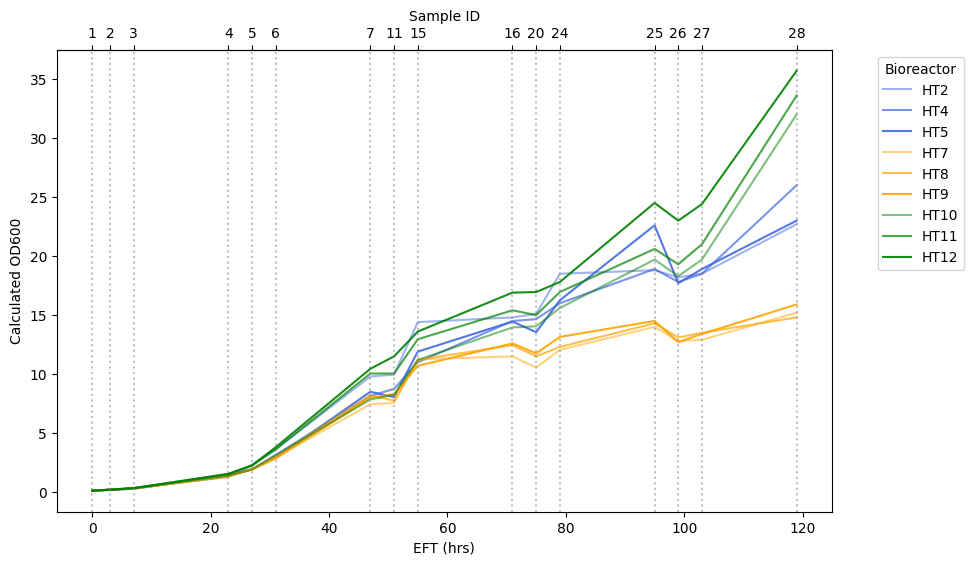

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided
time_hours = [0, 3, 7, 23, 27, 31, 47, 51, 55, 71, 75, 79, 95, 99, 103, 119]
sample_id = [1, 2, 3, 4, 5, 6, 7, 11, 15, 16, 20, 24, 25, 26, 27, 28]

# OD600 values for each bioreactor (HT2 to HT12)
od600_data = {
    'HT2': [0.119, 0.207, 0.354, 1.28, 2.3, 3.62, 9.8, 9.95, 14.4, 14.8, 15.1, 18.5, 18.8, 18.2, 18.5, 22.7],
    'HT4': [0.117, 0.196, 0.293, 1.43, 1.92, 3.14, 8.15, 8.75, 11.0, 14.5, 14.65, 16.0, 18.9, 17.8, 18.5, 26.0],
    'HT5': [0.117, 0.195, 0.292, 1.35, 1.94, 2.9, 8.5, 8.05, 11.9, 14.45, 13.55, 16.25, 22.6, 17.7, 18.9, 23.0],
    'HT7': [0.119, 0.194, 0.321, 1.31, 1.98, 2.94, 7.45, 7.55, 11.25, 11.5, 10.55, 12.05, 14.0, 12.8, 12.9, 15.2],
    'HT8': [0.122, 0.199, 0.312, 1.36, 1.91, 3.0, 8.2, 7.75, 11.2, 12.45, 11.5, 12.3, 14.3, 13.1, 13.5, 14.8],
    'HT9': [0.117, 0.203, 0.309, 1.35, 1.92, 2.84, 8.0, 8.3, 10.7, 12.6, 11.75, 13.15, 14.5, 12.7, 13.4, 15.9],
    'HT10': [0.123, 0.199, 0.329, 1.39, 1.92, 3.12, 7.85, 8.25, 11.2, 13.95, 14.05, 15.6, 19.7, 18.3, 19.7, 32.0],
    'HT11': [0.118, 0.204, 0.328, 1.51, 2.26, 3.62, 10.05, 10.05, 12.95, 15.4, 15.0, 16.95, 20.6, 19.3, 21.0, 33.6],
    'HT12': [0.128, 0.2, 0.336, 1.55, 2.26, 3.8, 10.45, 11.5, 13.6, 16.9, 16.95, 17.8, 24.5, 23.0, 24.4, 35.7]
}

# Define base colors for each group
colors = {
    'Group 1': 'royalblue',   # HT2, HT4, HT5
    'Group 2': 'orange',       # HT7, HT8, HT9
    'Group 3': 'green'         # HT10, HT11, HT12
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each bioreactor's data with gradient-like shades
for bioreactor, od600_values in od600_data.items():
    if bioreactor in ['HT2', 'HT4', 'HT5']:
        color = colors['Group 1']
        alpha = 0.3 + 0.2 * (['HT2', 'HT4', 'HT5'].index(bioreactor) + 1)  # Gradients for Group 1
    elif bioreactor in ['HT7', 'HT8', 'HT9']:
        color = colors['Group 2']
        alpha = 0.3 + 0.2 * (['HT7', 'HT8', 'HT9'].index(bioreactor) + 1)  # Gradients for Group 2
    elif bioreactor in ['HT10', 'HT11', 'HT12']:
        color = colors['Group 3']
        alpha = 0.3 + 0.2 * (['HT10', 'HT11', 'HT12'].index(bioreactor) + 1)  # Gradients for Group 3
    
    ax.plot(time_hours, od600_values, label=bioreactor, color=color, alpha=alpha)

# Adding labels and title
ax.set_xlabel('EFT (hrs)')
ax.set_ylabel('Calculated OD600')

# Adding secondary x-axis for Sample ID
secax = ax.secondary_xaxis('top')
secax.set_xticks(time_hours)
secax.set_xlabel('Sample ID')
secax.set_xticklabels(sample_id)

# Adding vertical dotted lines connecting Sample ID to time hours
for t, sample in zip(time_hours, sample_id):
    ax.axvline(x=t, linestyle=':', color='gray', alpha=0.5)

# Removing grid lines
plt.legend(title="Bioreactor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)

# Show plot
plt.show()
